In [30]:
# 
import json
import cv2
import requests
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.tiia.v20190529 import tiia_client
from tencentcloud.tiia.v20190529 import models as tiia_models
import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [37]:

try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "tiia.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = tiia_client.TiiaClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/宝马.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = tiia_models.RecognizeCarRequest()
    params = {
#         "ImageUrl": "",
        "ImageBase64": str(img, encoding='utf-8'), 

    }
    req.from_json_string(json.dumps(params))

    resp = client.RecognizeCar(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'CarCoords': [{'X': 500, 'Y': 867}, {'X': 500, 'Y': 132}, {'X': 1728, 'Y': 132}, {'X': 1728, 'Y': 867}], 'CarTags': [{'Serial': '宝马X1', 'Brand': '宝马', 'Type': '紧凑型SUV', 'Color': '银灰', 'Confidence': 62, 'Year': 2016, 'CarLocation': [{'X': 500, 'Y': 867}, {'X': 500, 'Y': 132}, {'X': 1728, 'Y': 132}, {'X': 1728, 'Y': 867}]}], 'RequestId': '4f0a2115-8e81-41f2-941d-3799ec8527ee'}


In [38]:
"""
CarCoords	Array of Coord	汽车的四个矩形顶点坐标，如果图片中存在多辆车，则输出最大车辆的坐标。
CarTags	Array of CarTagItem	车辆属性识别的结果数组，如果识别到多辆车，则会输出每辆车的top1结果。
RequestId	String	唯一请求 ID，每次请求都会返回。定位问题时需要提供该次请求的 RequestId。

CarTags:
    Serial	String	车系
    Brand	String	车辆品牌
    Type	String	车辆类型
    Color	String	车辆颜色
    Confidence	Integer	置信度，0-100
    Year	Integer	年份，没识别出年份的时候返回0
    CarLocation	Array of Coord	车辆在图片中的坐标信息
"""

'\nCarCoords\tArray of Coord\t汽车的四个矩形顶点坐标，如果图片中存在多辆车，则输出最大车辆的坐标。\nCarTags\tArray of CarTagItem\t车辆属性识别的结果数组，如果识别到多辆车，则会输出每辆车的top1结果。\nRequestId\tString\t唯一请求 ID，每次请求都会返回。定位问题时需要提供该次请求的 RequestId。\n\nCarTags:\n    Serial\tString\t车系\n    Brand\tString\t车辆品牌\n    Type\tString\t车辆类型\n    Color\tString\t车辆颜色\n    Confidence\tInteger\t置信度，0-100\n    Year\tInteger\t年份，没识别出年份的时候返回0\n    CarLocation\tArray of Coord\t车辆在图片中的坐标信息\n'

In [39]:
points=np.array([[pts["X"],pts["Y"]] for pts in resp['CarCoords']],np.int32)
points.reshape((-1,1,2))

array([[[ 500,  867]],

       [[ 500,  132]],

       [[1728,  132]],

       [[1728,  867]]])

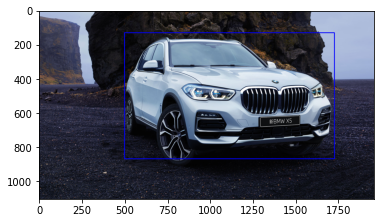

In [40]:
res=cv2.polylines(img=plt.imread(img_path), pts=[points], isClosed=True, color=(0,0,255), thickness=3)
plt.imshow(res)

In [42]:
CarTags=resp["CarTags"][0]
print("车系 ： ",CarTags["Serial"])
print("车辆品牌 ： ",CarTags["Brand"])
print("车辆类型 ： ",CarTags["Type"])
print("车辆颜色 ： ",CarTags["Color"])
print("置信度 ： ",CarTags["Confidence"])
print("年份 ： ",CarTags["Year"])
print("车辆在图片中的坐标信息 ： ",CarTags["CarLocation"])

车系 ：  宝马X1
车辆品牌 ：  宝马
车辆类型 ：  紧凑型SUV
车辆颜色 ：  银灰
置信度 ：  62
年份 ：  2016
车辆在图片中的坐标信息 ：  [{'X': 500, 'Y': 867}, {'X': 500, 'Y': 132}, {'X': 1728, 'Y': 132}, {'X': 1728, 'Y': 867}]
